TODO:

* implement Algorithm 1 
* apply it to the example from [here](https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b#:~:text=SHAP%20(SHapley%20Additive%20exPlanation)%20is,from%20it's%20individual%20feature%20values.&text=f%E2%82%9B()%20represents%20the%20prediction,model%20for%20the%20subset%20S.)
* use shap to reproduce the manually calculated outputs

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
import test_tree_shap

In [3]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
get_ipython().magic("load_ext autoreload")
get_ipython().magic("autoreload 2")

In [4]:
data, tree = test_tree_shap.toy_tree()

In [5]:
import tree_shap

In [18]:
assert tree_shap.naive_tree_shap(tree, current_node=0, features={0: 150}) == 20
assert tree_shap.naive_tree_shap(tree, current_node=0, features={1: 75}) == 27

# given feature 0, having feature 1 doesn't make a difference
assert (
    tree_shap.naive_tree_shap(tree, current_node=0, features={0: 150, 1: 75})
    == 20
)

In [8]:
import itertools

In [10]:
features_tuple = ((0, 150), (1, 75), (2, 200))

In [11]:
basis = data['y'].mean()
basis

23.0

**Need to rename the variables here to make it more readable**

In [44]:
all_phis = []
for permutation in itertools.permutations(features_tuple):
    phis = {'basis': basis}
    for i in range(len(permutation)):
        phi_raw = tree_shap.naive_tree_shap(tree, current_node=0, features=dict(permutation[:i + 1]))
        phi = phi_raw - sum(phis.values())
        phis[permutation[i][0]] = phi
    all_phis.append(phis)

In [45]:
all_phis

[{'basis': 23.0, 0: -3.0, 1: 0.0, 2: 0.0},
 {'basis': 23.0, 0: -3.0, 2: 0.0, 1: 0.0},
 {'basis': 23.0, 1: 4.0, 0: -7.0, 2: 0.0},
 {'basis': 23.0, 1: 4.0, 2: 0.0, 0: -7.0},
 {'basis': 23.0, 2: 0.0, 0: -3.0, 1: 0.0},
 {'basis': 23.0, 2: 0.0, 1: 4.0, 0: -7.0}]

In [48]:
pd.DataFrame(all_phis).mean(axis=0)

basis    23.0
0        -5.0
1         2.0
2         0.0
dtype: float64

In [36]:
from collections import OrderedDict

In [43]:
OrderedDict(features_tuple)[:2]

TypeError: unhashable type: 'slice'

In [38]:
list(itertools.permutations(OrderedDict(features_tuple)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

In [35]:
permutation

((2, 200), (1, 75), (0, 150))

In [27]:
phis

[23.0, 0.0, 4.0, -7.0]

In [28]:
permutation

((2, 200), (1, 75), (0, 150))

In [34]:
np.array(all_phis)[:, 1:]

array([[-3.,  0.,  0.],
       [-3.,  0.,  0.],
       [ 4., -7.,  0.],
       [ 4.,  0., -7.],
       [ 0., -3.,  0.],
       [ 0.,  4., -7.]])

In [33]:
np.array(all_phis)[:, 1:].mean(axis=0)

array([ 0.33333333, -1.        , -2.33333333])

In [29]:
itertools.subpermutation

(0, 1, 2)

In [10]:
tree.feature

array([ 0,  1, -2, -2,  0, -2, -2])

In [30]:
tree.tree_.value

array([[[15.]],

       [[40.]],

       [[50.]],

       [[30.]],

       [[10.]],

       [[20.]],

       [[10.]]])

In [46]:
tree.decision_path([[150, 75, 200]]).todense()

matrix([[1, 0, 0, 0, 1, 1, 0]])

In [17]:
tree.tree_.children_left

array([ 1,  2, -1, -1,  5, -1, -1])

In [18]:
tree.tree_.children_right

array([ 4,  3, -1, -1,  6, -1, -1])

In [23]:
tree.tree_.

4

In [24]:
tree.tree_.threshold

array([100., 300.,  -2.,  -2., 200.,  -2.,  -2.])

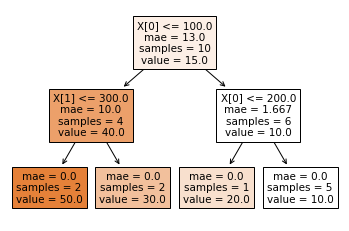

In [22]:
_ = plot_tree(tree, filled=True, proportion=False)

Explain for the example [x=150, y=75, z=200]

In [26]:
import sklearn

In [41]:
tree.tree_.threshold

array([100., 300.,  -2.,  -2., 200.,  -2.,  -2.])

In [40]:
tree.tree_.feature

array([ 0,  1, -2, -2,  0, -2, -2])

In [39]:
tree.tree_.children_left

array([ 1,  2, -1, -1,  5, -1, -1])

In [42]:
tree.tree_.children_right

array([ 4,  3, -1, -1,  6, -1, -1])

In [31]:
tree.tree_.children_left

array([ 1,  2, -1, -1,  5, -1, -1])

In [47]:
from collections import OrderedDict

In [56]:
features = [[1, 75], [2, 200], [0, 150]]

In [57]:
features[:2]

[[1, 75], [2, 200]]

In [58]:
tree.tree_.n_node_samples

array([10,  4,  2,  2,  6,  1,  5])

In [ ]:
def decision_path(i):
    """
    i: index of features
    """
    if i == tree.tree_.feature[0]

x > y > z

In [12]:
phi_x = 20 - phi_null

In [13]:
phi_y = 20 - phi_x - phi_null

In [14]:
phi_z = 20 - phi_y - phi_x - phi_null

In [15]:
phi_z

0.0

y > z > x

In [16]:
phi_y = (4 / 10) * 50 + (6 / 10) * (1 / 6 * 20 + 5 / 6 * 10) - phi_null

In [17]:
phi_y

4.0

In [18]:
phi_z = 0

In [19]:
phi_x = 20 - phi_y - phi_null

In [20]:
phi_x

-7.0

In [21]:
tree.predict([[150, 75, 200]])

array([20.])

In [22]:
X_test = pd.DataFrame({'x': [150], 'y': [75], 'z': [200]})

In [24]:
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_test)
shap_values

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


array([[-5.,  2.,  0.]])